In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers,models
from tensorflow.keras.utils import to_categorical

In [3]:
# Load MNIST dataset
(train_images,train_labels),(test_images,test_labels)=datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 15s 1us/step


In [4]:
# noralize pixel value from 0 to 1
train_images=train_images/255.0
test_images=test_images/255.0


In [5]:
# reshape images as they are greayscale

train_images=train_images.reshape((train_images.shape[0],28,28,1))
test_images=test_images.reshape((test_images.shape[0],28,28,1))

In [6]:
# conert labels into 1 hot encoded format
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [7]:
# build cnn model
model=models.Sequential()

In [10]:
# first convolutional layer
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

In [11]:
# second layer 

model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

In [14]:
# third

model.add(layers.Conv2D(64, (3, 3), activation="relu"))

In [15]:
# 3d output to 1d and add dense layer 

model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))

In [16]:
# 10 neurons
model.add(layers.Dense(10, activation="softmax"))


In [17]:
# compile the model 

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
# train model

model.fit(train_images,train_labels,epochs=5,batch_size=64,validation_data=(test_images,test_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 82ms/step - accuracy: 0.8676 - loss: 0.4038 - val_accuracy: 0.9839 - val_loss: 0.0482
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 74s 79ms/step - accuracy: 0.9832 - loss: 0.0534 - val_accuracy: 0.9835 - val_loss: 0.0508
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 81ms/step - accuracy: 0.9891 - loss: 0.0360 - val_accuracy: 0.9888 - val_loss: 0.0370
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 73s 78ms/step - accuracy: 0.9909 - loss: 0.0290 - val_accuracy: 0.9910 - val_loss: 0.0309
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 80ms/step - accuracy: 0.9932 - loss: 0.0207 - val_accuracy: 0.9917 - val_loss: 0.0255


In [20]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print("Test acc=",test_acc*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9891 - loss: 0.0326
Test acc= 99.16999936103821


In [27]:
predictions=model.predict(test_images)
print("prediction for first test image",np.argmax(predictions[45]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
prediction for first test image 5


In [25]:
import matplotlib.pyplot as plt

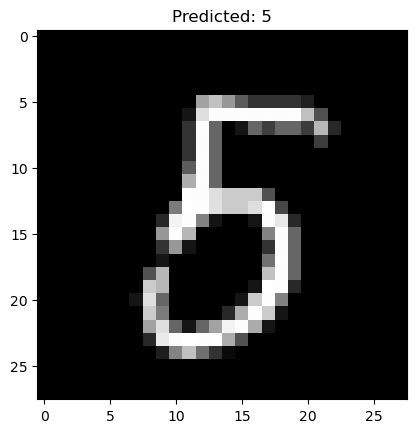

In [28]:
plt.imshow(test_images[45].reshape(28,28),cmap="gray")
plt.title(f"Predicted: {predictions[45].argmax()}")
plt.show()